In [15]:
%pip install flappy-bird-gym
%pip install matplotlib
# I am using python version 3.8.8, should be good with python version 3.7, 3.8, 3.9

  Using cached numpy-1.19.5-cp38-cp38-win_amd64.whl (13.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.24.4
    Uninstalling numpy-1.24.4:
      Successfully uninstalled numpy-1.24.4
Note: you may need to restart the kernel to use updated packages.


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

matplotlib 3.7.5 requires numpy<2,>=1.20, but you'll have numpy 1.19.5 which is incompatible.
You should consider upgrading via the 'c:\Users\Julia\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


  Using cached numpy-1.24.4-cp38-cp38-win_amd64.whl (14.9 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
Note: you may need to restart the kernel to use updated packages.


ERROR: After October 2020 you may experience errors when installing or updating packages. This is because pip will change the way that it resolves dependency conflicts.

We recommend you use --use-feature=2020-resolver to test your packages with the new resolver before it becomes the default.

flappy-bird-gym 0.3.0 requires numpy~=1.19.5, but you'll have numpy 1.24.4 which is incompatible.
You should consider upgrading via the 'c:\Users\Julia\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [16]:
import time
import flappy_bird_gym
import numpy as np
import matplotlib.pyplot as plt

In [17]:
env = flappy_bird_gym.make("FlappyBird-v0")

In [18]:
# print action space, observation space

print("Number of actions possible: ", env.action_space.n)
print("Observation space: ", env.observation_space)
print("Highest value: ", env.observation_space.high)
print("Lowest value: ", env.observation_space.low)

Number of actions possible:  2
Observation space:  Box(-2.0, 2.0, (2,), float32)
Highest value:  [2. 1.]
Lowest value:  [-2. -1.]


In [19]:
# Setup learing factors
epsilon = 0.01
episodes = 5000
discount = 0.99
alpha = 0.01

# Q Table
Q_TABLE = np.zeros((171, 2))

# Plotting
ep_rewards = []
ep_rewards_table = {'ep': [], 'dif': [], 'avg': [], 'min': [], 'max': []}

ep_display = 500

In [20]:
for episode in range(episodes):
    # Reset environment for new episode
    obs = env.reset()
    done = False
    prev_rewards = -1000

    # Get Initial State
    obs = obs * 10
    obs = np.round(obs).astype(int)
    obs[0] += 2
    obs[1] += 3

    prev_action = 0
    state = obs[0] * obs[1]
    episode_reward = 0

    # Number of steps per episode
    while not done:

        # Step
        next, reward, done, info = env.step(prev_action)

        # Get next state
        next = next * 10
        next = np.round(next).astype(int)
        next[0] += 2
        next[1] += 3

        next_state = next[0] * next[1]

        # Epsilon greedy
        if np.random.rand() > epsilon:
            next_action = np.argmax(Q_TABLE[next_state])
        else:
            next_action = env.action_space.sample()

        # Update Q(s,a)
        max_q_next = np.max(Q_TABLE[next_state])
        Q_TABLE[state][prev_action] += alpha * (reward + (discount * max_q_next) - Q_TABLE[state][prev_action])

        # if you want to see the rendering uncomment the stuff below
        #
        # if episode > 0 and episode % ep_display == 0:
        #     env.render()
        #     time.sleep(1 / 60)  # FPS

        # Update state for
        prev_action = next_action
        state = next_state
        episode_reward += reward

        if done:
            break
    
    ep_rewards.append(episode_reward)
    
    if not episode % ep_display:
        avg_reward = sum(ep_rewards[-ep_display:])/len(ep_rewards[-ep_display:])
        ep_rewards_table['ep'].append(episode)
        ep_rewards_table['avg'].append(avg_reward)
        ep_rewards_table['min'].append(min(ep_rewards[-ep_display:]))
        ep_rewards_table['max'].append(max(ep_rewards[-ep_display:]))
		
        print(f"Episode:{episode} avg:{avg_reward} min:{min(ep_rewards[-ep_display:])} max:{max(ep_rewards[-ep_display:])}")
        prev_rewards = avg_reward

env.close()

Episode:0 avg:-535.0 min:-535 max:-535
Episode:500 avg:871.49 min:-535 max:1895
Episode:1000 avg:904.49 min:-370 max:1595
Episode:1500 avg:1141.1 min:-310 max:6200
Episode:2000 avg:1615.79 min:-370 max:11300
Episode:2500 avg:1483.19 min:-370 max:6800
Episode:3000 avg:1466.69 min:-250 max:7685
Episode:3500 avg:1613.12 min:-250 max:9035
Episode:4000 avg:1575.32 min:-310 max:6830
Episode:4500 avg:1562.99 min:-295 max:7940


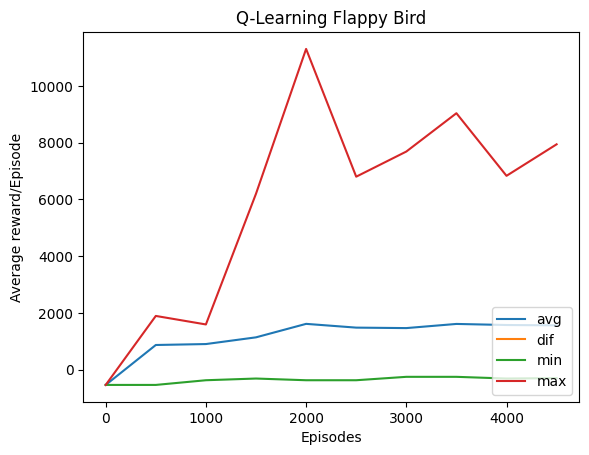

In [21]:
plt.plot(ep_rewards_table['ep'], ep_rewards_table['avg'], label="avg")
plt.plot(ep_rewards_table['dif'], ep_rewards_table['dif'], label="dif")
plt.plot(ep_rewards_table['ep'], ep_rewards_table['min'], label="min")
plt.plot(ep_rewards_table['ep'], ep_rewards_table['max'], label="max")
plt.legend(loc=4) #bottom right
plt.title('Q-Learning Flappy Bird')
plt.ylabel('Average reward/Episode')
plt.xlabel('Episodes')
plt.show()